In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Temporal trends for posts and comments

### Posts


In [3]:
posts = pd.read_csv("/Users/fabianmahner/submissions-fabioconsiglio/Project/data/archive/the-reddit-climate-change-dataset-posts.csv")


In [4]:
posts

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,x2smmw,2vh0v,democraticsocialism,False,1661990237,https://old.reddit.com/r/DemocraticSocialism/c...,twitter.com,https://twitter.com/SusanofTexas/status/156480...,NaN,“Cities without water” is our future. The lead...,15
1,post,x2slxy,2w844,nostupidquestions,False,1661990182,https://old.reddit.com/r/NoStupidQuestions/com...,self.nostupidquestions,NaN,Ok so I was having a conversation with my neig...,Sharks and climate change,2
2,post,x2slk5,6wzx9b,eduwriters,False,1661990150,https://old.reddit.com/r/EduWriters/comments/x...,eduwriters.pro,https://eduwriters.pro/?cid=2860/?utm_source=r...,NaN,How to start a climate change essay,1
3,post,x2sbz6,46adh7,alternatitvereality,False,1661989389,https://old.reddit.com/r/AlternatitveReality/c...,i.imgur.com,https://i.imgur.com/wJbchkQ.jpg,NaN,Ever notice that when it’s hot a few days in J...,1
4,post,x2sa2a,2qh1i,askreddit,False,1661989240,https://old.reddit.com/r/AskReddit/comments/x2...,self.askreddit,NaN,[deleted],How would you react if the next American presi...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
620903,post,aki85,2qh1n,environment,False,1262350233,https://old.reddit.com/r/environment/comments/...,seminal.firedoglake.com,http://seminal.firedoglake.com/diary/21707,NaN,Climate Change: Five Easy New Year’s Resolutions,0
620904,post,akgtp,2qk5q,climateskeptics,False,1262333495,https://old.reddit.com/r/climateskeptics/comme...,examiner.com,http://www.examiner.com/x-25061-Climate-Change...,NaN,2009 climate change story of the year - Climat...,4
620905,post,akgkb,2qk5q,climateskeptics,False,1262330777,https://old.reddit.com/r/climateskeptics/comme...,ritholtz.com,http://www.ritholtz.com/blog/2009/12/statistic...,NaN,Statistics: Scientific Consensus on Climate Ch...,0
620906,post,akgbz,2qk5q,climateskeptics,False,1262328753,https://old.reddit.com/r/climateskeptics/comme...,wattsupwiththat.com,http://wattsupwiththat.com/2009/12/31/ultimate...,NaN,Ultimate irony: Snowstorm squelches “screaming...,9


In [5]:
# Umwandlung der Timestamps in ein lesbares Datumsformat
posts["created_utc"] = pd.to_datetime(posts["created_utc"], unit="s")
posts["created_utc"]

0        2022-08-31 23:57:17
1        2022-08-31 23:56:22
2        2022-08-31 23:55:50
3        2022-08-31 23:43:09
4        2022-08-31 23:40:40
                 ...        
620903   2010-01-01 12:50:33
620904   2010-01-01 08:11:35
620905   2010-01-01 07:26:17
620906   2010-01-01 06:52:33
620907   2010-01-01 00:12:30
Name: created_utc, Length: 620908, dtype: datetime64[ns]

In [6]:
posts['year'] = posts['created_utc'].dt.year

In [7]:
posts

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score,year
0,post,x2smmw,2vh0v,democraticsocialism,False,2022-08-31 23:57:17,https://old.reddit.com/r/DemocraticSocialism/c...,twitter.com,https://twitter.com/SusanofTexas/status/156480...,NaN,“Cities without water” is our future. The lead...,15,2022
1,post,x2slxy,2w844,nostupidquestions,False,2022-08-31 23:56:22,https://old.reddit.com/r/NoStupidQuestions/com...,self.nostupidquestions,NaN,Ok so I was having a conversation with my neig...,Sharks and climate change,2,2022
2,post,x2slk5,6wzx9b,eduwriters,False,2022-08-31 23:55:50,https://old.reddit.com/r/EduWriters/comments/x...,eduwriters.pro,https://eduwriters.pro/?cid=2860/?utm_source=r...,NaN,How to start a climate change essay,1,2022
3,post,x2sbz6,46adh7,alternatitvereality,False,2022-08-31 23:43:09,https://old.reddit.com/r/AlternatitveReality/c...,i.imgur.com,https://i.imgur.com/wJbchkQ.jpg,NaN,Ever notice that when it’s hot a few days in J...,1,2022
4,post,x2sa2a,2qh1i,askreddit,False,2022-08-31 23:40:40,https://old.reddit.com/r/AskReddit/comments/x2...,self.askreddit,NaN,[deleted],How would you react if the next American presi...,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
620903,post,aki85,2qh1n,environment,False,2010-01-01 12:50:33,https://old.reddit.com/r/environment/comments/...,seminal.firedoglake.com,http://seminal.firedoglake.com/diary/21707,NaN,Climate Change: Five Easy New Year’s Resolutions,0,2010
620904,post,akgtp,2qk5q,climateskeptics,False,2010-01-01 08:11:35,https://old.reddit.com/r/climateskeptics/comme...,examiner.com,http://www.examiner.com/x-25061-Climate-Change...,NaN,2009 climate change story of the year - Climat...,4,2010
620905,post,akgkb,2qk5q,climateskeptics,False,2010-01-01 07:26:17,https://old.reddit.com/r/climateskeptics/comme...,ritholtz.com,http://www.ritholtz.com/blog/2009/12/statistic...,NaN,Statistics: Scientific Consensus on Climate Ch...,0,2010
620906,post,akgbz,2qk5q,climateskeptics,False,2010-01-01 06:52:33,https://old.reddit.com/r/climateskeptics/comme...,wattsupwiththat.com,http://wattsupwiththat.com/2009/12/31/ultimate...,NaN,Ultimate irony: Snowstorm squelches “screaming...,9,2010


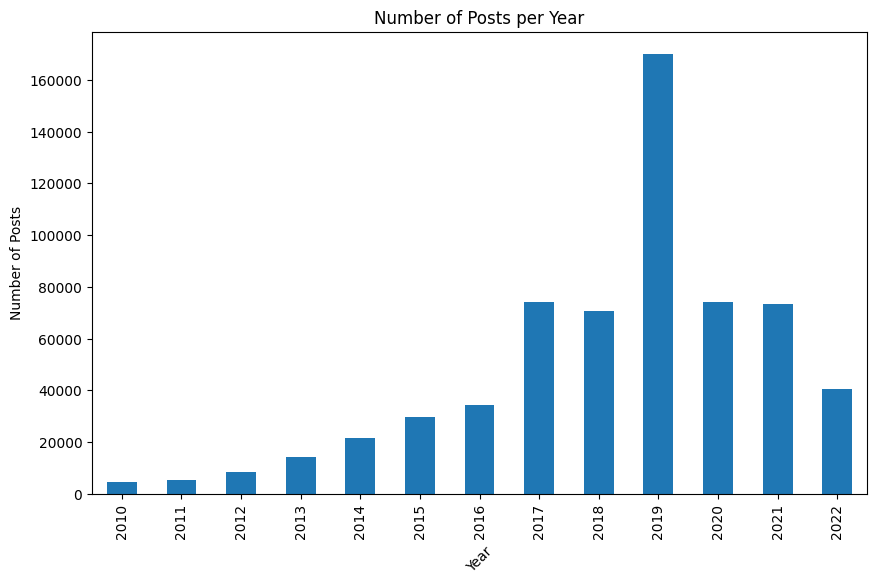

In [11]:
posts_per_year = posts['year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
posts_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Year')
plt.show()

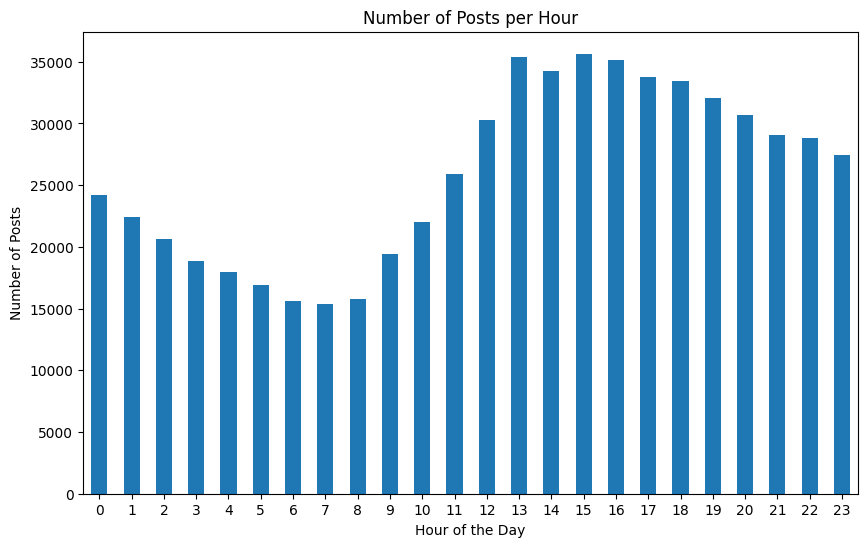

In [46]:
posts['hour'] = posts['created_utc'].dt.hour

# Count the number of posts per hour
posts_per_hour = posts.groupby('hour').size()

# Plot the distribution
plt.figure(figsize=(10,6))
posts_per_hour.plot(kind='bar')
plt.title('Number of Posts per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()

### Comments

In [79]:
comments = pd.read_csv("/Users/fabianmahner/submissions-fabioconsiglio/Project/data/archive/the-reddit-climate-change-dataset-comments.csv")

In [40]:
# Umwandlung der Timestamps in ein lesbares Datumsformat
comments["created_utc"] = pd.to_datetime(comments["created_utc"], unit="s")
comments["created_utc"]

0         2022-08-31 23:59:28
1         2022-08-31 23:59:00
2         2022-08-31 23:58:47
3         2022-08-31 23:57:58
4         2022-08-31 23:56:46
                  ...        
4600693   2010-01-01 12:37:36
4600694   2010-01-01 07:05:41
4600695   2010-01-01 02:54:40
4600696   2010-01-01 02:30:18
4600697   2010-01-01 00:34:07
Name: created_utc, Length: 4600698, dtype: datetime64[ns]

In [43]:
comments['year'] = comments['created_utc'].dt.year

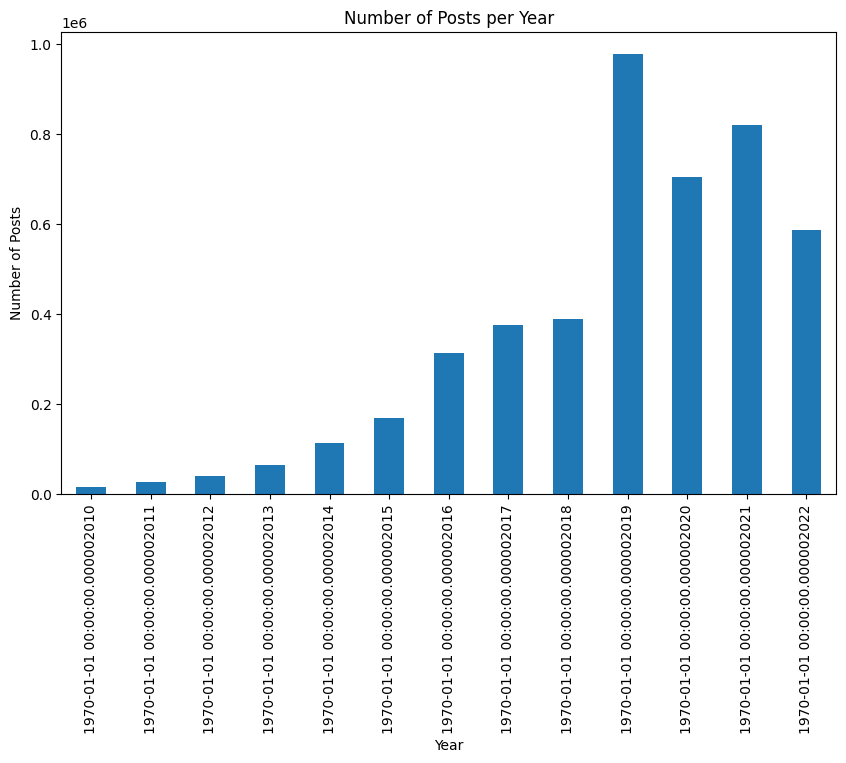

In [78]:
comments_per_year = comments['year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
comments_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Year')
plt.show()

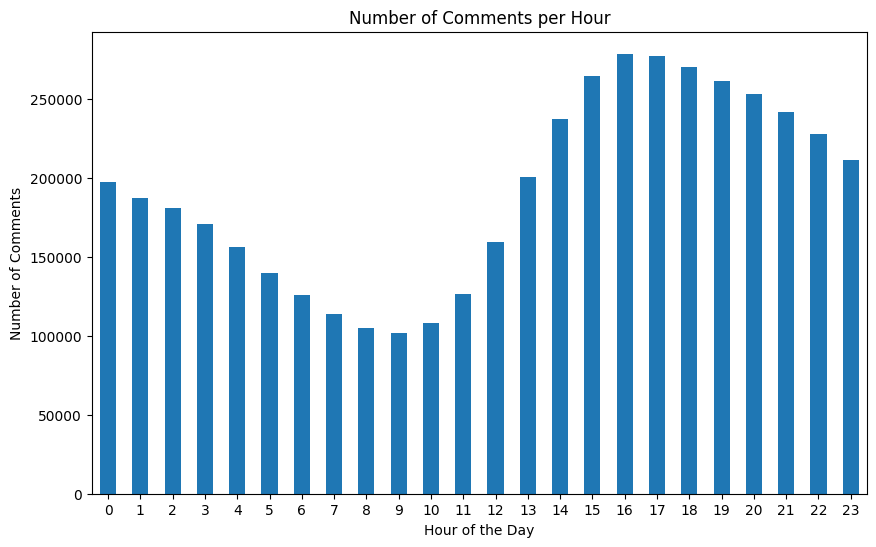

In [49]:
comments['hour'] = comments['created_utc'].dt.hour

# Count the number of posts per hour
comments_per_hour = comments.groupby('hour').size()

# Plot the distribution
plt.figure(figsize=(10,6))
comments_per_hour.plot(kind='bar')
plt.title('Number of Comments per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.show()

### bar charts of most common words/hashtags in posts and comments


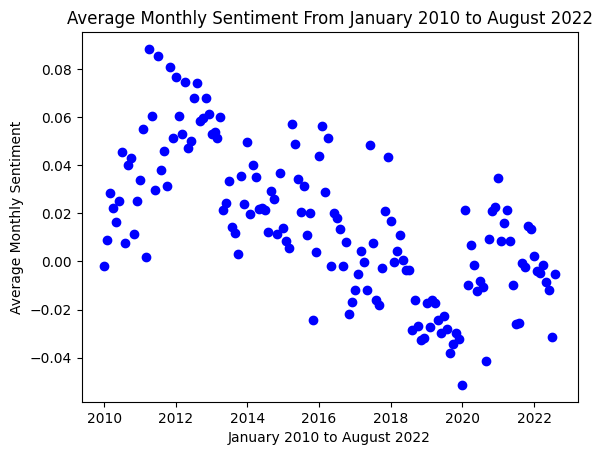

In [71]:
avgMonthlySentimentSeries = comments.groupby(pd.PeriodIndex(comments['created_utc'], freq="M"))['sentiment'].mean()

plt.scatter(avgMonthlySentimentSeries.index.to_timestamp(),avgMonthlySentimentSeries,color="blue")

plt.title("Average Monthly Sentiment From January 2010 to August 2022")

#Label the x-axis
plt.xlabel("January 2010 to August 2022")

# label the y-axis
plt.ylabel("Average Monthly Sentiment")

# show the plot
plt.show()

#boxplot oder barchart für die sentimentverteilung
# halb jährlich oder jahres ebene zusammenfassen

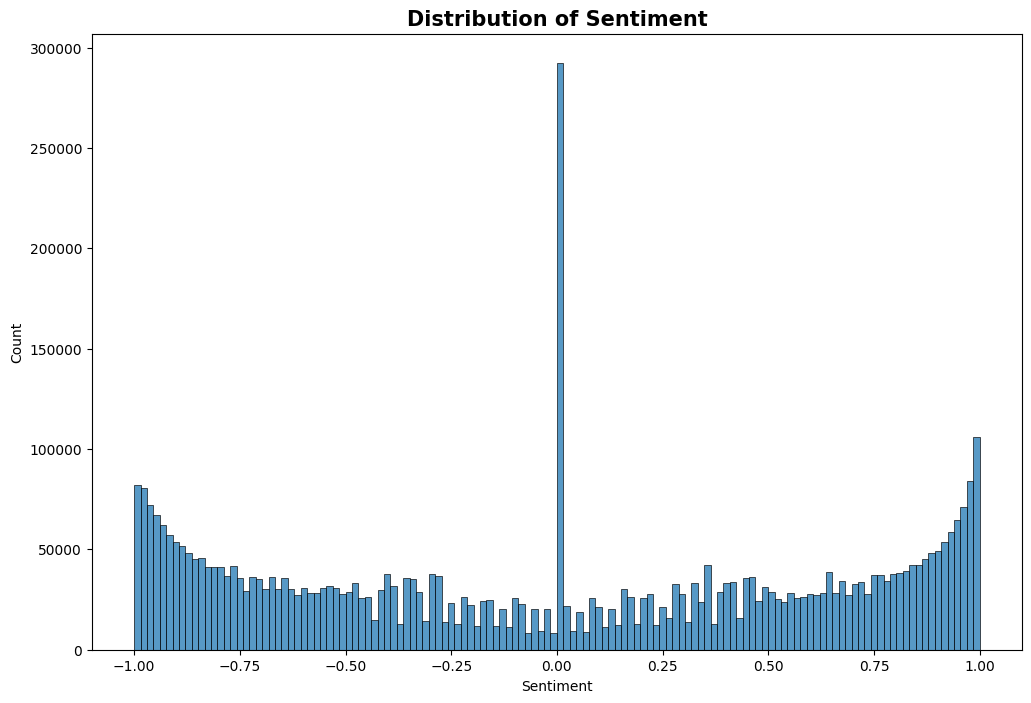

In [53]:
plt.figure(figsize=(12, 8))

# Plotting using histplot to include KDE
ax = sns.histplot(comments["sentiment"])
plt.title('Distribution of Sentiment', fontweight='bold', fontsize=15)
plt.xlabel('Sentiment')

# Display the plot
plt.show()

### Number of posts, comments, unique subreddits and most common words

In [19]:
# word frequency distribution 
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import wordcloud
import string
import nltk 
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fabianmahner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fabianmahner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
sample_comments_df = comments.sample(10000, random_state=42)

In [61]:
sample_comments_df

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,year,hour
601364,comment,hq5npyl,2qh68,canada,False,2021-12-27 15:45:50,https://old.reddit.com/r/canada/comments/rpq8f...,TL; DR:\n\nIn a [year-end report](https://angu...,0.2732,1,2021,15
2529486,comment,exiswa4,2qh68,canada,False,2019-08-20 21:01:51,https://old.reddit.com/r/canada/comments/cssil...,Right - but its not about just saying it as an...,0.4497,1,2019,21
3951853,comment,d9tzhdt,2tk95,dataisbeautiful,False,2016-11-10 05:48:43,https://old.reddit.com/r/dataisbeautiful/comme...,&gt; Are you saying they stuffed 3.6 million v...,0.6242,1,2016,5
4521247,comment,c768v0g,2qhw9,collapse,False,2012-11-25 00:52:40,https://old.reddit.com/r/collapse/comments/13q...,The planet historically has supported about on...,0.8327,1,2012,0
3642615,comment,dj7t9qv,2qh4j,europe,False,2017-06-21 20:15:41,https://old.reddit.com/r/europe/comments/6ikkt...,"The intent number 1 was there, just not the se...",-0.5789,1,2017,20
...,...,...,...,...,...,...,...,...,...,...,...,...
4329026,comment,co2dyq8,2qh6p,conservative,False,2015-01-27 15:01:11,https://old.reddit.com/r/Conservative/comments...,"Yes, when you see climate change in everything...",0.4019,3,2015,15
4044734,comment,d5q8d5z,2zbq7,sandersforpresident,False,2016-07-25 17:32:49,https://old.reddit.com/r/SandersForPresident/c...,"My reference to ""4 years"" was not the length o...",0.9828,1,2016,17
3106858,comment,ec77qus,2qh1n,environment,False,2018-12-20 19:26:40,https://old.reddit.com/r/environment/comments/...,Bull shit with your natural cycles! This is a...,0.8222,13,2018,19
3565982,comment,dmuk6n5,2qh4j,europe,False,2017-09-11 08:26:42,https://old.reddit.com/r/europe/comments/6zanz...,Even global climate change is predicted to hav...,-0.0772,5,2017,8


In [24]:
raw_comments = pd.read_csv("/Users/fabianmahner/dlss-project24/data/raw/comments_sample.csv")

# lemmatized column nehmen 
# column title_lemmatized 
# column title_selftext_lemmatized
# most common words in a column of a dataframe erstellen


In [26]:
preprocessed_comments

,Unnamed: 0.1,Unnamed: 0,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,cleaned,lemmatized
0,0,2413869,comment,f1bk4k3,2qh9a,worldpolitics,True,2019-09-24 14:48:09,https://old.reddit.com/r/worldpolitics/comment...,https://www.penmediainc.com/2019/09/23/climate...,NaN,2,NaN,NaN
1,1,1798232,comment,frqfnw7,2qh3l,news,False,2020-05-25 03:24:43,https://old.reddit.com/r/news/comments/gpsw3x/...,"Nice try, but false equivalency is still false...",0.6652,7,nice try but false equivalency is still false ...,nice try but false equivalency be still false ...
2,2,3713094,comment,dh9dp98,2qh1n,environment,False,2017-05-07 22:21:02,https://old.reddit.com/r/environment/comments/...,"I'm slightly torn on this, the idea of nations...",-0.9294,0,i slightly torn on this the idea of nations tr...,I slightly tear on this the idea of nation try...
3,3,407658,comment,i1vluk4,2snwr,australianpolitics,False,2022-03-24 01:44:54,https://old.reddit.com/r/AustralianPolitics/co...,*Article contents as always:*\n\n&amp;#x200B;\...,0.9624,1,article contents as always australian premier ...,article content as always australian premier p...
4,4,1803618,comment,fr9nzyu,2qm4e,askscience,False,2020-05-20 18:53:22,https://old.reddit.com/r/askscience/comments/g...,What is the current outlook for ocean acidific...,0.0000,2,what is the current outlook for ocean acidific...,what be the current outlook for ocean acidific...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,980852,comment,h8859gb,2snwr,australianpolitics,False,2021-08-08 23:34:47,https://old.reddit.com/r/AustralianPolitics/co...,The usual reason - their policies most closely...,0.1476,19,the usual reason their policies most closely a...,the usual reason their policy most closely ali...
1996,1996,1811365,comment,fqo3dlb,2qqjc,todayilearned,False,2020-05-15 01:39:04,https://old.reddit.com/r/todayilearned/comment...,"it's not deep though, it is a surface level ob...",-0.7165,1,it not deep though it is a surface level obser...,it not deep though it be a surface level obser...
1997,1997,1977038,comment,fhhct09,3c6l1,aboringdystopia,False,2020-02-13 13:36:44,https://old.reddit.com/r/ABoringDystopia/comme...,"**Hello u/UltimateWebRedditor, unfortunately y...",0.9350,1,hello u ultimatewebredditor unfortunately your...,hello u ultimatewebredditor unfortunately your...
1998,1998,1064543,comment,h4s5us0,2qhkd,energy,False,2021-07-11 05:48:27,https://old.reddit.com/r/energy/comments/ohtue...,&gt; New conventional nuclear plants... exorbi...,-0.9010,-3,gt new conventional nuclear plants exorbitant ...,gt new conventional nuclear plant exorbitant c...


In [22]:
preprocessed_comments = pd.read_csv("/Users/fabianmahner/dlss-project24/data/preprocessed/comments.csv")

# Perform basic statistics: number of posts, word frequency distribution, most common words, etc.
# Calculate the number of posts
num_posts = posts.shape[0]

# Calculate the number of comments
num_comments = preprocessed_comments.shape[0]

# Calculate the number of unique subreddits

num_subreddits = preprocessed_comments["subreddit.name"].nunique()   

# Combine all comments into a single string
all_comments = " ".join(preprocessed_comments["lemmatized"])

# Tokenize the string
tokens = word_tokenize(all_comments)

# Remove punctuation and lowercase the tokens
table = str.maketrans('', '', string.punctuation)
tokens = [word.translate(table) for word in tokens]
tokens = [word.lower() for word in tokens]

# Remove remaining tokens that are not alphabetic
tokens = [word for word in tokens if word.isalpha()]

# Filter out stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if not word in stop_words]

# Create a frequency distribution
freq_dist = Counter(tokens)

# Get the 10 most common words
most_common = freq_dist.most_common(10)

# Display the results
print(f"Number of posts: {num_posts}")
print(f"Number of comments: {num_comments}")
print(f"Number of unique subreddits: {num_subreddits}")
print("\nMost common words:")
for word, freq in most_common:
    print(f"{word}: {freq}")

TypeError: sequence item 0: expected str instance, float found

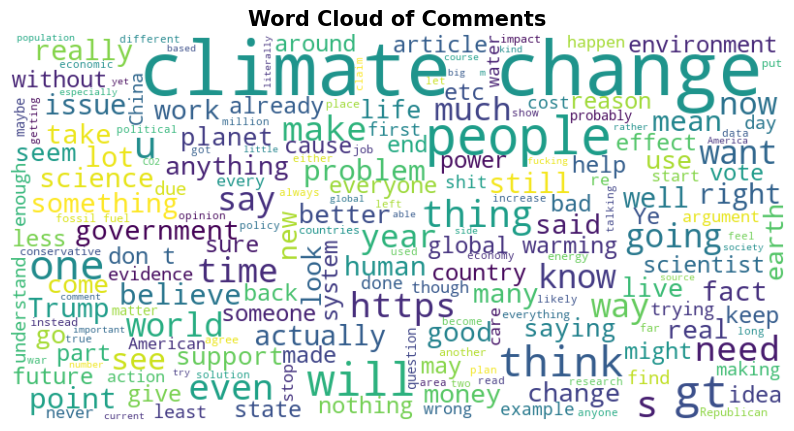

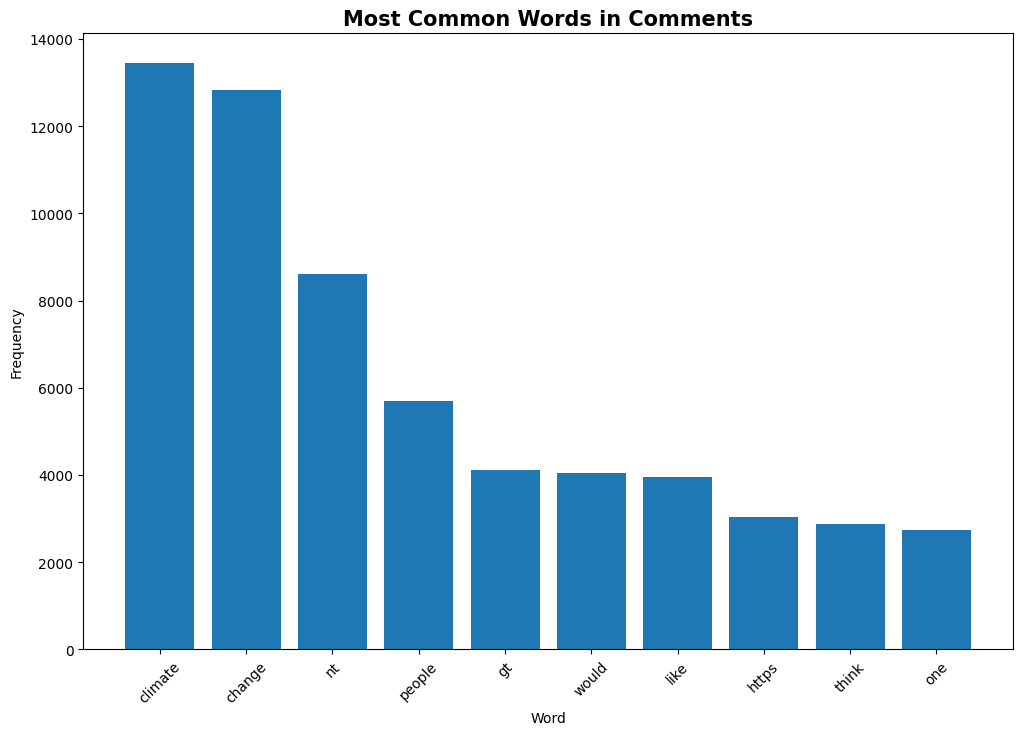

In [68]:
# Visualize the data, e.g. word clouds, bar charts of most common words/hashtags and temporal trends in the number of posts.
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_comments)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments', fontweight='bold', fontsize=15)
plt.show()




In [ ]:
# Create a bar chart of the most common words
plt.figure(figsize=(12, 8))
plt.bar([word for word, freq in most_common], [freq for word, freq in most_common])
plt.title('Most Common Words in Comments', fontweight='bold', fontsize=15)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
### MOST COMMON WORDS IN COMMENTS

# Initialize a dictionary to store the most common word for each year
most_common_words = {}

# Define a function to tokenize and find the most common word
def most_common_word(texts):
    all_text = ' '.join(texts)
    words = re.findall(r'\b\w+\b', all_text.lower())
    word_counts = Counter(words)
    most_common_word, frequency = word_counts.most_common(1)[0]
    return most_common_word, frequency

# Iterate over each year and find the most common word
for year, group in df.groupby('year'):
    texts = group['text'].dropna().tolist()
    common_word, freq = most_common_word(texts)
    most_common_words[year] = (common_word, freq)

# Print the most common word for each year
for year, (word, freq) in most_common_words.items():
    print(f"The most common word in {year} is '{word}' with a frequency of {freq}.")


### Test


In [12]:
comments_sample = pd.read_csv("/Users/fabianmahner/dlss-project24/data/raw/comments_sample.csv")
posts_sample = pd.read_csv("/Users/fabianmahner/dlss-project24/data/raw/posts_sample.csv")

In [14]:
# Function to calculate comments-per-post ratio
def calculate_comments_per_post_ratio(comments_sample, posts_sample):
    # Group by year and count the number of posts
    posts_per_year = comments_sample.groupby('year').size().rename('posts')
    
    # Group by year and count the number of comments
    comments_per_year = posts_sample.groupby('year').size().rename('comments')
    
    # Combine the counts into a single DataFrame
    ratio_df = pd.concat([posts_per_year, comments_per_year], axis=1)
    
    # Calculate the comments-per-post ratio
    ratio_df['comments_per_post'] = ratio_df['comments'] / ratio_df['posts']
    
    return ratio_df

# Calculate the comments-per-post ratio for each DataFrame
ratio_df1 = calculate_comments_per_post_ratio(comments_sample, posts_sample)

# Add a column to indicate the source DataFrame
ratio_df1['source'] = 'df1'

# Combine both DataFrames

# Plotting the results

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ratio_df1, x='year', y='comments_per_post', hue='source')
plt.title('Comments-per-Post Ratio Over Years (Scatter Plot)')
plt.xlabel('Year')
plt.ylabel('Comments-per-Post Ratio')
plt.legend(title='DataFrame')
plt.grid(True)
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=comments_sample, x='year', y='comments_per_post', hue='source', multiple='dodge')
plt.title('Comments-per-Post Ratio Over Years (Histogram)')
plt.xlabel('Year')
plt.ylabel('Comments-per-Post Ratio')
plt.legend(title='DataFrame')
plt.grid(True)
plt.show()

KeyError: 'year'